## Projections

At the start of the chapter, we considered the projection of one vector onto the direction of another, and how to use that projection to decompose the vector into two orthogonal components.  We then considered the higher dimensional analogy of projecting a vector onto a subspace and, using that projection to decompose the vector into orthogonal components.   In this section, we concentrate these concepts, and consider projections as linear transformations which have applications beyond vector decomposition.

A linear transformation $T:\mathbb{R}^n \to \mathbb{R}^n$ is a **projection** if $T\circ T = T$.  The result of applying a projection once is the same as the result of applying it twice.  We can understand the effect of a projection as the collapsing of a vector in $\mathbb{R}^n$ onto a subspace $\mathcal{V}$.  Once a vector as been projected onto $\mathcal{V}$, any further projection onto $\mathcal{V}$ has no effect.      


### Example 1

We look first at an orthogonal projection onto the $x_1$-axis in $\mathbb{R}^2$.  This transformation $T:\mathbb{R}^2\to\mathbb{R}^2$ can be defined with the following formula.

$$
\begin{equation}
T\left( \left[ \begin{array}{r} x \\ y \end{array} \right]\right) =
\left[ \begin{array}{r} x \\ 0 \end{array} \right]
\end{equation}
$$

This projection simply carries all vectors onto the $x_1$-axis based on their first entry.

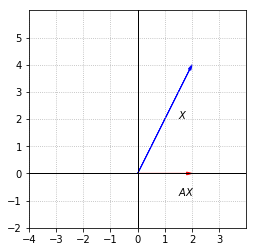

In [37]:
%matplotlib inline
import numpy as np
import laguide as lag
import matplotlib.pyplot as plt

x=np.linspace(-6,6,100)

fig, ax = plt.subplots()

options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,4,fc='b',ec='b',**options)
ax.arrow(0,0,2,0,fc='r',ec='r',**options)

ax.set_xlim(-4,4)
ax.set_ylim(-2,6)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-4,4,step = 1))
ax.set_yticks(np.arange(-2,6,step = 1))

ax.text(1.5,2,'$X$')
ax.text(1.5,-0.8,'$AX$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

### Example 2

We look first at $P:\mathbb{R}^2 \to \mathbb{R}^2$ defined by $P(X) = AX$ where $A$ is the following matrix.

$$
\begin{equation}
\left[\begin{array}{rr} 3/2 & -3/2 \\ 1/2 & -1/2 \end{array}\right]
\end{equation}
$$

To verify that $P$ is indeed a projection, we need to check that $A^2X = AX$ for every $X$ in $\mathbb{R}^2$.  This will be true if $A^2=A$.


In [25]:
A = np.array([[1.5, -1.5],[0.5, -0.5]])
print(A@A)

[[ 1.5 -1.5]
 [ 0.5 -0.5]]


Now that we know $P$ is a projection, let's consider the effect of $P$ a bit more carefully.  We observe that the second column is a multiple of the first.  This means that $\mathcal{C}(A)$ is one-dimensional.  Since $A^2=A$, we 
know that any vector $X$ in the column space will be unchanged by when multiplied by $A$.


$$
\begin{equation}
AX = \left[\begin{array}{rr} 3/2 & -3/2 \\ 1/2 & -1/2 \end{array}\right]
\left[\begin{array}{r} 3k \\ k \end{array}\right] =
\left[\begin{array}{r} 3k \\ k \end{array}\right] = X
\end{equation}
$$

Next, let's observe the effect of $P$ on a vector $X$ that is not in $\mathcal{C}(A)$

$$
\begin{equation}
AX = \left[\begin{array}{rr} 3/2 & -3/2 \\ 1/2 & -1/2 \end{array}\right]
\left[\begin{array}{r} 4 \\ 2 \end{array}\right] =
\left[\begin{array}{r} 3 \\ 1 \end{array}\right] 
\end{equation}
$$



In [26]:
X = np.array([[1],[-1]])
print(A@X)

[[3.]
 [1.]]


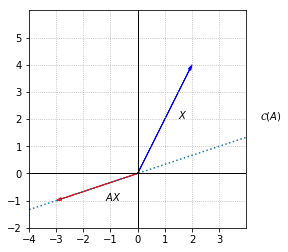

In [27]:
fig, ax = plt.subplots()

ax.arrow(0,0,2,4,fc='b',ec='b',**options)
ax.arrow(0,0,-3,-1,fc='r',ec='r',**options)
ax.plot(x,x/3,ls=':')

ax.set_xlim(-4,4)
ax.set_ylim(-2,6)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-4,4,step = 1))
ax.set_yticks(np.arange(-2,6,step = 1))

ax.text(1.5,2,'$X$')
ax.text(-1.2,-1,'$AX$')
ax.text(4.5,2,'$\mathcal{C}(A)$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

We see of course that $AX$ is in $\mathcal{C}(A)$, but in contrast to the projections in earlier sections, this projections is not orthogonal.  If we decompose $X$ into components $AX$ and $X-AX$, we see that these components are not orthogonal.

In [28]:
V = A@X
W = X-V
print(lag.DotProduct(V,W))

-8.0


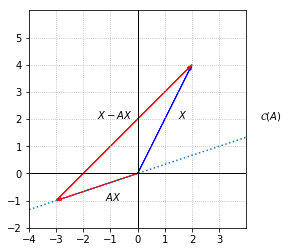

In [33]:
fig, ax = plt.subplots()

ax.arrow(0,0,2,4,fc='b',ec='b',**options)
ax.arrow(-3,-1,5,5,fc='r',ec='r',**options)
ax.arrow(0,0,-3,-1,fc='r',ec='r',**options)
ax.plot(x,x/3,ls=':')

ax.set_xlim(-4,4)
ax.set_ylim(-2,6)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-4,4,step = 1))
ax.set_yticks(np.arange(-2,6,step = 1))

ax.text(1.5,2,'$X$')
ax.text(-1.2,-1,'$AX$')
ax.text(-1.5,2,'$X-AX$')
ax.text(4.5,2,'$\mathcal{C}(A)$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

The transformation is projecting onto $\mathcal{C}(A)$, but *not in the orthogonal direction*.  To reveal the direction of the projection, we look at $\mathcal{N}(A)$.  

$$
\begin{equation}
\mathcal{N}(A) = \textrm{Span of} \left\{ \left[ \begin{array}{r} 1 \\ 1 \end{array} \right]\right\}
\end{equation}
$$

Any vector in $\mathcal{N}(A)$ is projected to the zero vector.  The key point is that $AX-X$ must be in $\mathcal{N}(A)$ precisely because $A$ represents a projection and $A^2=A$.

$$
\begin{equation}
A(AX-X) = A^2X - AX = AX - AX = 0  
\end{equation}
$$

In general, projections take all vectors onto one subspace, in the direction of another subspace.